# Cleaning movie dataset
#### by Jérôme d'Harveng

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#gathering">Gathering the data</a></li>
<li><a href="#assessing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
<li><a href="#exporting">Exporting to csv</a></li>
</ul>

<a id='gathering'></a>
## Gathering

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_movies = pd.read_csv('movie_metadata.csv')

<a id='assessing'></a>
## Assessing

### Rearrange Columns

In [3]:
# list of column names
column_names = df_movies.columns.values.tolist()
column_names

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'gross',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [4]:
# rearrange the column orders 
new_column_order = ['movie_title','genres','director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
                     'country', 'language', 'color', 'plot_keywords', 'title_year','facenumber_in_poster' ,'budget', 
                    'gross', 'duration', 'aspect_ratio','movie_imdb_link', 'imdb_score', 'content_rating', 
                    'num_voted_users','num_user_for_reviews','num_critic_for_reviews','movie_facebook_likes', 
                    'director_facebook_likes', 'actor_1_facebook_likes','actor_2_facebook_likes',
                    'actor_3_facebook_likes','cast_total_facebook_likes'
                   ]

# quick check
print(len(column_names))
print(len(new_column_order))

28
28


In [5]:
# rearrange the columns
df_movies = df_movies[new_column_order]

### Columns 

In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
movie_title                  5043 non-null object
genres                       5043 non-null object
director_name                4939 non-null object
actor_1_name                 5036 non-null object
actor_2_name                 5030 non-null object
actor_3_name                 5020 non-null object
country                      5038 non-null object
language                     5031 non-null object
color                        5024 non-null object
plot_keywords                4890 non-null object
title_year                   4935 non-null float64
facenumber_in_poster         5030 non-null float64
budget                       4551 non-null float64
gross                        4159 non-null float64
duration                     5028 non-null float64
aspect_ratio                 4714 non-null float64
movie_imdb_link              5043 non-null object
imdb_score                   5043 non

### Visual inspection

In [7]:
df_movies.shape

(5043, 28)

In [8]:
df_movies.head(3)

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,country,language,color,plot_keywords,...,content_rating,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,USA,English,Color,avatar|future|marine|native|paraplegic,...,PG-13,886204,3054.0,723.0,33000,0.0,1000.0,936.0,855.0,4834
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,USA,English,Color,goddess|marriage ceremony|marriage proposal|pi...,...,PG-13,471220,1238.0,302.0,0,563.0,40000.0,5000.0,1000.0,48350
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,UK,English,Color,bomb|espionage|sequel|spy|terrorist,...,PG-13,275868,994.0,602.0,85000,0.0,11000.0,393.0,161.0,11700


In [9]:
df_movies.sample(5)

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,country,language,color,plot_keywords,...,content_rating,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
4305,Roadside Romeo,Animation|Comedy|Family|Romance,Jugal Hansraj,Saif Ali Khan,Sanjay Mishra,Javed Jaffrey,India,Hindi,Color,india|love|love at first sight|mumbai india|re...,...,PG,922,17.0,6.0,39,32.0,532.0,85.0,24.0,653
2152,Raiders of the Lost Ark,Action|Adventure,Steven Spielberg,Harrison Ford,Karen Allen,William Hootkins,USA,English,Color,archeological dig|archeologist|ark of the cove...,...,PG,661017,771.0,234.0,16000,14000.0,11000.0,783.0,488.0,12906
3858,Life During Wartime,Comedy|Drama,Todd Solondz,Rich Pecci,Shirley Henderson,Charlotte Rampling,USA,English,Color,forgiveness|ghost|new jersey|pedophile|three s...,...,R,5465,37.0,159.0,0,377.0,1000.0,887.0,844.0,5041
4695,House of Wax,Horror,Jaume Collet-Serra,Robert Ri'chard,Paris Hilton,Brian Van Holt,Australia,English,Color,brother sister relationship|group of friends|m...,...,R,94463,576.0,228.0,0,174.0,730.0,716.0,324.0,2160
4102,Happiness,Comedy|Drama,Todd Solondz,Philip Seymour Hoffman,Jon Lovitz,Dylan Baker,USA,English,Color,ensemble cast|episodic structure|satire|social...,...,NaN,55329,499.0,148.0,0,377.0,22000.0,11000.0,812.0,36859


### Missing Values

In [10]:
df_movies.isnull().sum()

movie_title                    0
genres                         0
director_name                104
actor_1_name                   7
actor_2_name                  13
actor_3_name                  23
country                        5
language                      12
color                         19
plot_keywords                153
title_year                   108
facenumber_in_poster          13
budget                       492
gross                        884
duration                      15
aspect_ratio                 329
movie_imdb_link                0
imdb_score                     0
content_rating               303
num_voted_users                0
num_user_for_reviews          21
num_critic_for_reviews        50
movie_facebook_likes           0
director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
dtype: int64

In [11]:
# Percentage of missing values for different columns in descending order
(df_movies.isnull().sum().sort_values(ascending=False)/df_movies.shape[0])*100

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_facebook_likes       2.062265
director_name                 2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
color                         0.376760
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
language                      0.237954
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
genres                        0.000000
cast_total_facebook_likes     0.000000
movie_imdb_link               0.000000
imdb_score                    0.000000
num_voted_users          

### Duplicates 

In [12]:
df_movies.duplicated(subset=['movie_title','director_name','actor_1_name','title_year','country',\
                             'language','imdb_score']).sum()

123

In [13]:
df_movies[df_movies.duplicated(subset=['movie_title','director_name','actor_1_name','title_year',\
                                       'country','language','imdb_score'])].head(5)

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,country,language,color,plot_keywords,...,content_rating,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
137,The Legend of Tarzan,Action|Adventure|Drama|Romance,David Yates,Christoph Waltz,Alexander Skarsgård,Casper Crump,USA,English,Color,africa|capture|jungle|male objectification|tarzan,...,PG-13,42372,239.0,248.0,29000,282.0,11000.0,10000.0,103.0,21175
187,The Twilight Saga: Breaking Dawn - Part 2,Adventure|Drama|Fantasy|Romance,Bill Condon,Robert Pattinson,Kristen Stewart,Taylor Lautner,USA,English,Color,battle|friend|super strength|vampire|vision,...,PG-13,185394,329.0,322.0,65000,386.0,21000.0,17000.0,12000.0,59177
204,Godzilla Resurgence,Action|Adventure|Drama|Horror|Sci-Fi,Hideaki Anno,Mark Chinnery,Shin'ya Tsukamoto,Atsuko Maeda,Japan,Japanese,Color,blood|godzilla|monster|sequel,...,NaN,374,13.0,1.0,0,28.0,544.0,106.0,12.0,699
303,Pan,Adventure|Family|Fantasy,Joe Wright,Hugh Jackman,Cara Delevingne,Nonso Anozie,USA,English,Color,1940s|child hero|fantasy world|orphan|referenc...,...,PG,39956,186.0,256.0,24000,456.0,20000.0,548.0,394.0,21393
389,Fantastic Four,Action|Adventure|Sci-Fi,Josh Trank,Tim Blake Nelson,Reg E. Cathey,Tim Heidecker,USA,English,Color,box office flop|critically bashed|portal|telep...,...,PG-13,110486,695.0,369.0,41000,128.0,596.0,360.0,78.0,1261


In [14]:
# Quick check on 2 duplicates
df_movies.query('director_name=="David Yates" and duration == 110.0')

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,country,language,color,plot_keywords,...,content_rating,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
63,The Legend of Tarzan,Action|Adventure|Drama|Romance,David Yates,Christoph Waltz,Alexander Skarsgård,Casper Crump,USA,English,Color,africa|capture|jungle|male objectification|tarzan,...,PG-13,42372,239.0,248.0,29000,282.0,11000.0,10000.0,103.0,21175
137,The Legend of Tarzan,Action|Adventure|Drama|Romance,David Yates,Christoph Waltz,Alexander Skarsgård,Casper Crump,USA,English,Color,africa|capture|jungle|male objectification|tarzan,...,PG-13,42372,239.0,248.0,29000,282.0,11000.0,10000.0,103.0,21175


#### Comments:
> - **Duplicate values** : there are 123 duplicated lines 
> - **Missing values** :
>   * "gross" and "budget" have the biggest amount of missing values, but as we would like to use them to compute the revenue, and in this case it wouldn't give good results to replace the missing values by some computed value, we'll delete the associated rows. **Once those deleted, we'll reavuluate the amount of missing values for the other columns**
>   * "aspect_ratio", as we won't include it in our study, we'll delete this column
>   * "plot_keywords", missing values will be replaced by " ".

> - **Types of the columns**:
>    * Several columns are in float instead of int format (num_critic_for_reviews,num_user_for_reviews, director_facebook_likes,actor_1_facebook_likes, actor_2_facebook_likes, actor_3_facebook_likes, budget, gross,title_year)
> - **Adding Column**
>   * adding column "revenue" = "budget"-"gross"
> - **Column content**
>   *'plot_keywords' and 'genre'

<a id='cleaning'></a>
## Cleaning

<a href="#table">Table of Content</a>

### Starting by making a copy of dataset

In [15]:
df_movies_clean = df_movies.copy()

#### 1. Remove duplicates

##### Define

Removing the 123 duplicated rows detected during the assessing

##### Code

In [16]:
df_movies_clean.drop_duplicates(subset=['movie_title','director_name','actor_1_name','title_year','country',\
                             'language','imdb_score'],inplace=True)

##### Test

In [17]:
df_movies_clean.duplicated(subset=['movie_title','director_name','actor_1_name','title_year','country',\
                             'language','imdb_score']).sum()

0

#### 2. Handling missing valvues for "gross" and "budget"

##### Define

Even as the amount of missing values are high, we would like to use those figures further in the exploration. So we can't simply replace them by 0 or other types of values (mean, median). That's why we decide to delete the rows linked to those missing values.

##### Code

In [18]:
# Drop the rows with na values
df_movies_clean = df_movies_clean.dropna(subset=['gross','budget'])

##### Test

In [19]:
(df_movies_clean.isnull().sum().sort_values(ascending=False)/df_movies_clean.shape[0])*100

aspect_ratio                 1.952507
content_rating               1.345646
plot_keywords                0.817942
actor_3_facebook_likes       0.263852
actor_3_name                 0.263852
facenumber_in_poster         0.158311
actor_2_facebook_likes       0.131926
actor_2_name                 0.131926
actor_1_facebook_likes       0.079156
language                     0.079156
actor_1_name                 0.079156
color                        0.052770
duration                     0.026385
num_critic_for_reviews       0.026385
country                      0.000000
director_name                0.000000
genres                       0.000000
cast_total_facebook_likes    0.000000
gross                        0.000000
title_year                   0.000000
budget                       0.000000
movie_imdb_link              0.000000
imdb_score                   0.000000
num_voted_users              0.000000
num_user_for_reviews         0.000000
movie_facebook_likes         0.000000
director_fac

#### 3. Handling missing values for "aspect_ratio" and "facenumber_in_poster"

##### Define

As we won't use those 2 variables in further exploration, as they seem less relevant, we'll drop the columns.

##### Code

In [20]:
df_movies_clean = df_movies_clean.drop(['aspect_ratio','facenumber_in_poster'],axis=1)

##### Test

In [21]:
df_movies_clean.shape

(3790, 26)

In [22]:
print(df_movies_clean.columns.values.tolist())

['movie_title', 'genres', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'country', 'language', 'color', 'plot_keywords', 'title_year', 'budget', 'gross', 'duration', 'movie_imdb_link', 'imdb_score', 'content_rating', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews', 'movie_facebook_likes', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes']


#### 4. Handling missing values for other columns

##### Define

As the amount of missing values 'duration', 'num_critic_for_reviews', 'color', 'language', 'actor_1_name', 'actor_1_facebook_likes' are really small, we'll delete the associated rows

##### Code

In [23]:
# Drop the rows with na values
df_movies_clean = df_movies_clean.dropna(subset=['duration', 'num_critic_for_reviews', 'color', 
                                                 'language', 'actor_1_name', 'actor_1_facebook_likes'])

##### Test

In [24]:
df_movies_clean[['duration', 'num_critic_for_reviews', 'color', 'language', 'actor_1_name', 
                 'actor_1_facebook_likes']].isnull().sum()

duration                  0
num_critic_for_reviews    0
color                     0
language                  0
actor_1_name              0
actor_1_facebook_likes    0
dtype: int64

#### 5. Handling the rest of the missing values

##### Define

- For 'content_rating', 'plot_keywords', 'actor_2_name', 'actor_3_name' , we'll replace the missing values by " "

- For 'actor_2_facebook_likes' and 'actor_3_facebook_likes' the missing values will be replaced by 0.

##### Code

In [25]:
df_movies_clean[['content_rating', 'plot_keywords', 'actor_2_name', 'actor_3_name']] =\
            df_movies_clean[['content_rating', 'plot_keywords', 'actor_2_name', 'actor_3_name']].fillna(value=" ")

In [26]:
df_movies_clean[['actor_2_facebook_likes','actor_3_facebook_likes']] = df_movies_clean[['actor_2_facebook_likes','actor_3_facebook_likes']].fillna(value=0)

##### Test

In [27]:
df_movies_clean[['content_rating', 'plot_keywords', 'actor_2_name', 'actor_3_name']].isnull().sum()

content_rating    0
plot_keywords     0
actor_2_name      0
actor_3_name      0
dtype: int64

In [28]:
df_movies_clean[['actor_2_facebook_likes','actor_3_facebook_likes']].isnull().sum()

actor_2_facebook_likes    0
actor_3_facebook_likes    0
dtype: int64

#### 6. Converting datatypes (float to int)

##### Define

Following columns will be changed from float datatype to int datatype:
'num_critic_for_reviews','num_user_for_reviews', 'director_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'budget', 'gross','title_year'

##### Code

In [29]:
df_movies_clean[['num_critic_for_reviews','num_user_for_reviews', 'director_facebook_likes','actor_1_facebook_likes',
                 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'budget', 'gross','title_year']]=\
               df_movies_clean[['num_critic_for_reviews','num_user_for_reviews', 'director_facebook_likes','actor_1_facebook_likes',
                 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'budget', 'gross','title_year']].astype('int')

##### Test

In [30]:
df_movies_clean[['num_critic_for_reviews','num_user_for_reviews', 'director_facebook_likes','actor_1_facebook_likes',
                 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'budget', 'gross','title_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3780 entries, 0 to 5042
Data columns (total 9 columns):
num_critic_for_reviews     3780 non-null int64
num_user_for_reviews       3780 non-null int64
director_facebook_likes    3780 non-null int64
actor_1_facebook_likes     3780 non-null int64
actor_2_facebook_likes     3780 non-null int64
actor_3_facebook_likes     3780 non-null int64
budget                     3780 non-null int64
gross                      3780 non-null int64
title_year                 3780 non-null int64
dtypes: int64(9)
memory usage: 295.3 KB


#### 7. Refactor  'plot_keywords'

##### Define

In those 2 columns, the words are separated by '|' and we'll split them in lists

##### Code

In [31]:
df_movies_clean['genres_col1'] = df_movies_clean['genres'].apply(lambda x: x.split('|')[0].lower())

In [32]:
df_movies_clean['plot_keywords'] = df_movies_clean['plot_keywords'].apply(lambda x: x.split('|'))

##### Test

In [33]:
df_movies_clean[['genres','genres_col1','plot_keywords']].sample(5)

,genres,genres_col1,plot_keywords
554,Action|Drama|Fantasy|Romance,action,"[burned alive, castration, olympus, torture, t..."
1042,Crime|Drama|Mystery|Thriller,crime,"[new york city, police, quadriplegic, serial k..."
1287,Action|Comedy|Crime,action,"[murder, on the run, security camera, surveill..."
582,Adventure|Animation|Comedy|Family|Fantasy|Romance,adventure,"[drag queen, physical appearance, princess, qu..."
2244,Drama|Romance,drama,"[brother sister relationship, high school grad..."


#### 8. Content_rating column (Feature Engineering)

##### Define

Content_rating has different mixed categories. We'll uniformize those and delete the once missing.

##### Code

In [34]:
df_movies_clean.content_rating.value_counts()

R            1699
PG-13        1280
PG            560
G              91
               47
Not Rated      41
Unrated        24
Approved       17
X               9
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

**Comments:**

according to source: https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system
> - M = GP = PG  => we'll convert all of those to PG
> - X = NC-17   => we'll convert the X to NC-17
> - We'll transform "Not Rated", "Unrated", "Approved" and "Passed" by the most commun category = R

In [35]:
# Drop line where no content_rating
df_movies_clean = df_movies_clean.query('content_rating != " "')

In [36]:
# Convert M and GP into PG
df_movies_clean['content_rating'] = df_movies_clean['content_rating'].apply(lambda x: 'PG' if (x=='M' or x=='GP') 
                                                                           else x)

In [37]:
# Convert X into NC-17
df_movies_clean['content_rating'] = df_movies_clean['content_rating'].apply(lambda x: 'NC-17' if (x=='X') 
                                                                           else x)

In [38]:
# Convert "Not Rated", "Unrated", "Approved" and "Passed"into "R"
df_movies_clean['content_rating'] = df_movies_clean['content_rating'].apply(lambda x: 'R' 
                                                        if (x=="Not Rated" or x=="Unrated" or x=="Approved" or
                                                           x=="Passed") 
                                                        else x)

##### Test

In [39]:
df_movies_clean.content_rating.value_counts()

R        1784
PG-13    1280
PG        563
G          91
NC-17      15
Name: content_rating, dtype: int64

#### 9. Cleaning "movie_title"

##### Define

Removing "\xa0", in the movie titles

##### Code

In [40]:
df_movies_clean['movie_title'] = df_movies_clean['movie_title'].apply(lambda x: x.replace("\xa0",""))

##### Test

In [41]:
df_movies_clean['movie_title'].head(3).values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre'],
      dtype=object)

### Looking for outliers

In [42]:
likes = ['movie_facebook_likes','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
        'actor_3_facebook_likes','cast_total_facebook_likes']
money = ['budget','gross']
base_color = sb.color_palette()[0]

#### Release year

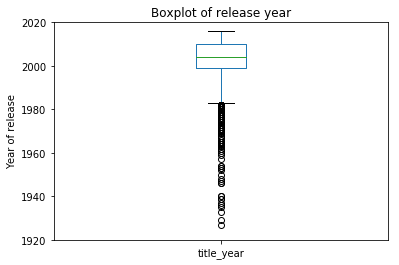

In [43]:
df_movies_clean['title_year'].plot(kind='box')
plt.ylabel('Year of release')
plt.ylim([1920,2020])
plt.title("Boxplot of release year");

In [44]:
df_movies_clean.title_year.describe()

count    3733.000000
mean     2002.984731
std         9.937723
min      1927.000000
25%      1999.000000
50%      2004.000000
75%      2010.000000
max      2016.000000
Name: title_year, dtype: float64

In [45]:
df_movies_clean.query('title_year == 1927')

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,country,language,color,plot_keywords,...,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,genres_col1
2734,Metropolis,Drama|Sci-Fi,Fritz Lang,Brigitte Helm,Gustav Fröhlich,Rudolf Klein-Rogge,Germany,German,Black and White,"[art deco, bible quote, dance, silent film, wo...",...,111841,413,260,12000,756,136,23,18,203,drama


##### Comments:
> After doublechecking the information this movie on Google, the conclusion is that this value isn't an outlier

#### Duration

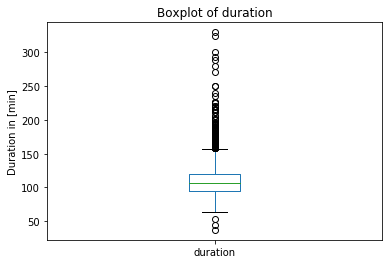

In [46]:
df_movies_clean['duration'].plot(kind='box')
plt.ylabel('Duration in [min]')
plt.title("Boxplot of duration");

In [47]:
df_movies_clean.duration.describe()

count    3733.000000
mean      109.918296
std        22.641446
min        37.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       330.000000
Name: duration, dtype: float64

In [48]:
df_movies_clean.query('duration > 300')

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,country,language,color,plot_keywords,...,num_voted_users,num_user_for_reviews,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,genres_col1
1144,Heaven's Gate,Adventure|Drama|Western,Michael Cimino,Jeff Bridges,Sam Waterston,Isabelle Huppert,USA,English,Color,"[1890s, hired gun, immigrant, johnson county w...",...,9830,189,102,1000,517,12000,849,678,14255,adventure
1501,"Blood In, Blood Out",Crime|Drama,Taylor Hackford,Delroy Lindo,Jesse Borrego,Raymond Cruz,USA,English,Color,"[1970s, 1980s, barrio, gang war, mexican]",...,23181,129,12,6000,138,848,674,672,3227,crime


In [49]:
df_movies_clean.query('duration < 60')[['movie_title','movie_imdb_link','duration','title_year','country']]

,movie_title,movie_imdb_link,duration,title_year,country
3318,Flame and Citron,http://www.imdb.com/title/tt0920458/?ref_=fn_t...,45.0,2008,Denmark
4003,Evil Dead II,http://www.imdb.com/title/tt0092991/?ref_=fn_t...,37.0,1987,USA
4586,Taxi to the Dark Side,http://www.imdb.com/title/tt0854678/?ref_=fn_t...,53.0,2007,USA


##### Comments:
> after looking on imdb, those durations are correct for all the movies but "Evil Dead II" with a duration of 84min and "Taxi to the Dark Side" with 106 min.

##### Code

In [50]:
df_movies_clean.loc[[4003], ['duration']] = 84
df_movies_clean.loc[[4586], ['duration']] = 106

##### Test

In [51]:
print(df_movies_clean.loc[4003][['movie_title','movie_imdb_link','duration','title_year','country']])
print(df_movies_clean.loc[4586][['movie_title','movie_imdb_link','duration','title_year','country']])

movie_title                                             Evil Dead II
movie_imdb_link    http://www.imdb.com/title/tt0092991/?ref_=fn_t...
duration                                                          84
title_year                                                      1987
country                                                          USA
Name: 4003, dtype: object
movie_title                                    Taxi to the Dark Side
movie_imdb_link    http://www.imdb.com/title/tt0854678/?ref_=fn_t...
duration                                                         106
title_year                                                      2007
country                                                          USA
Name: 4586, dtype: object


#### Money related columns

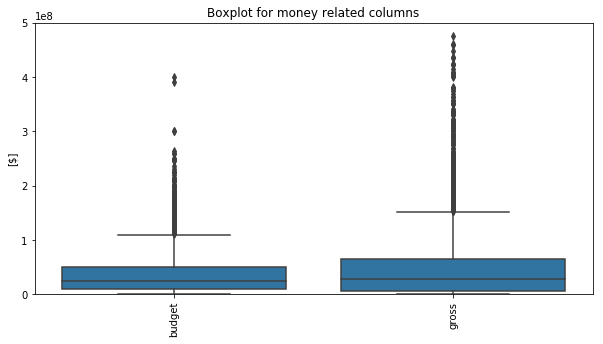

In [52]:
plt.figure(figsize = [10,5])
sb.boxplot(x="variable", y="value", data=df_movies_clean[money].melt(),color=base_color)
plt.title("Boxplot for money related columns")
plt.ylim([0,500000000])
plt.xlabel("")
plt.ylabel("[$]")
plt.xticks(rotation = 90);
plt.show()

In [53]:
df_movies_clean[money].describe()

,budget,gross
count,3.733000e+03,3.733000e+03
mean,4.504893e+07,5.092484e+07
std,2.265484e+08,6.897250e+07
min,2.180000e+02,1.620000e+02
25%,1.000000e+07,7.156725e+06
50%,2.400000e+07,2.803125e+07
75%,5.000000e+07,6.553507e+07
max,1.221550e+10,7.605058e+08


In [54]:
df_movies_clean.query('budget == 1.221550e+10')[['movie_title','director_name','duration','movie_imdb_link',
                                                  'imdb_score','budget','gross']]

,movie_title,director_name,duration,movie_imdb_link,imdb_score,budget,gross
2988,The Host,Joon-ho Bong,110.0,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,7.0,12215500000,2201412


In [55]:
df_movies_clean.query('budget == 1.221550e+10')['movie_imdb_link']

2988    http://www.imdb.com/title/tt0468492/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

##### Comments:
> after looking at the IMDB link, it seems that the budget is given as KRW 12,215,500,000 which is approximatively
10 921 414 US dollars. So we'll replace the budget by this value.

##### Code

In [56]:
df_movies_clean.loc[[2988], ['budget']] = 10921414

#### Let's have a closer look to some other budget, gross outliers

##### First looking at budgets which seems to be too high

In [57]:
def count_outliers(data,list_columns):
    for composant in list_columns:
        # defition of the indicators
        max_comp = data[composant].max()
        qtiles_1_3 = list(data[composant].quantile([0.25,0.75]))
        inter_qt = (qtiles_1_3[1]-qtiles_1_3[0])
        max_IQR = qtiles_1_3[1] + 1.5*inter_qt
        lim_sup = min(max_comp,max_IQR)
        
        tot_length = data.shape[0]
        print(composant.upper())
        print(max_IQR)
        criteria = (data[composant]> lim_sup)
        print("Number of outliers")
        print(criteria.sum())   
        print("% of outliers vs length data")
        print((criteria.sum()/tot_length)*100)
        print("")

In [58]:
count_outliers(df_movies_clean,money)

BUDGET
110000000.0
Number of outliers
256
% of outliers vs length data
6.857755156710422

GROSS
153102580.0
Number of outliers
269
% of outliers vs length data
7.206000535762122



In [59]:
df_movies_clean.sort_values(by=['budget'],ascending=False)[['movie_title','director_name','country','duration','movie_imdb_link',
                                                  'imdb_score','budget','gross']].head(12)

,movie_title,director_name,country,duration,movie_imdb_link,imdb_score,budget,gross
3859,Lady Vengeance,Chan-wook Park,South Korea,112.0,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,7.7,4200000000,211667
3005,Fateless,Lajos Koltai,Hungary,134.0,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,7.1,2500000000,195888
2323,Princess Mononoke,Hayao Miyazaki,Japan,134.0,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,8.4,2400000000,2298191
2334,Steamboy,Katsuhiro Ôtomo,Japan,103.0,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,6.9,2127519898,410388
3423,Akira,Katsuhiro Ôtomo,Japan,124.0,http://www.imdb.com/title/tt0094625/?ref_=fn_t...,8.1,1100000000,439162
4542,Godzilla 2000,Takao Okawara,Japan,99.0,http://www.imdb.com/title/tt0188640/?ref_=fn_t...,6.0,1000000000,10037390
3075,Kabhi Alvida Naa Kehna,Karan Johar,India,193.0,http://www.imdb.com/title/tt0449999/?ref_=fn_t...,6.0,700000000,3275443
3851,Tango,Carlos Saura,Spain,115.0,http://www.imdb.com/title/tt0120274/?ref_=fn_t...,7.2,700000000,1687311
1338,Red Cliff,John Woo,China,150.0,http://www.imdb.com/title/tt0425637/?ref_=fn_t...,7.4,553632000,626809
3311,The Legend of Suriyothai,Chatrichalerm Yukol,Thailand,300.0,http://www.imdb.com/title/tt0290879/?ref_=fn_t...,6.6,400000000,454255


##### Define (Inconsistency)

We'll have a closer look to the budget of the 11 highest budget. As those are not from the US and as we observed for the South Koerean "The Host", those could be in foreign currencies.

The Budget of 
> - "Lady Vengeance" is in South Korean currency => we'll convert it to US dollars
> - "Fateless" is in Hungarian currency 
> - "Princess Mononoke" is in Japanese currency
> - "Steamboy" is in Japanese currency
> - "Akira" is in Japanese currency
> - "Godzilla" is in Japanese currency
> - "Tango" is in previous spanisch peseta's
> - "Kabhi Alvida Naa Kehna" is in Indian currency
> - "Kites" is in Indian currency
> - "Red Cliff" is in Chinese currency
> - "Ong Bag 2" is in Thais currency


##### Code

In [60]:
df_movies_clean.loc[[3859], ['budget']] = 3756709
df_movies_clean.loc[[3005], ['budget']] = 8912524
df_movies_clean.loc[[2323], ['budget']] = 21833226
df_movies_clean.loc[[2334], ['budget']] = 19354426
df_movies_clean.loc[[3423], ['budget']] = 10006895
df_movies_clean.loc[[4542], ['budget']] = 13000000 
df_movies_clean.loc[[3851], ['budget']] = 4799396
df_movies_clean.loc[[3075], ['budget']] = 9864937
#df_movies_clean.loc[[3273], ['budget']] = 8455349
df_movies_clean.loc[[1338], ['budget']] = 82035784
df_movies_clean.loc[[1016], ['budget']] = 85000000
df_movies_clean.loc[[2740], ['budget']] = 9514851


In [61]:
df_movies_clean.query('(budget>110000000) and (country != "USA") ')[['movie_title','director_name','country','duration','movie_imdb_link',
                                                  'imdb_score','budget','gross']].head(5)

,movie_title,director_name,country,duration,movie_imdb_link,imdb_score,budget,gross
2,Spectre,Sam Mendes,UK,148.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,245000000,200074175
9,Harry Potter and the Half-Blood Prince,David Yates,UK,153.0,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,7.5,250000000,301956980
12,Quantum of Solace,Marc Forster,UK,106.0,http://www.imdb.com/title/tt0830515/?ref_=fn_t...,6.7,200000000,168368427
20,The Hobbit: The Battle of the Five Armies,Peter Jackson,New Zealand,164.0,http://www.imdb.com/title/tt2310332/?ref_=fn_t...,7.5,250000000,255108370
25,King Kong,Peter Jackson,New Zealand,201.0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,7.2,207000000,218051260


##### Let's automate the check of the currency on the imdb url

In [62]:
# Movies above the Boxplot limit and for which country isn't USA
budget_check = df_movies_clean.query('(budget>110000000) and (country != "USA") ')[['movie_title','country',
                                                                                    'movie_imdb_link','budget','gross']]

In [63]:
import requests
from bs4 import BeautifulSoup

In [64]:
# Method to download the movie imdb webpage through its url
def page_download(url):
    response = requests.get(url)
    content = response.content
    parser = BeautifulSoup(content,'html.parser')    
    return parser

In [65]:
# Methode for extracting the budget from the parser
def url_movie_budget(parser):
    movie_details = parser.find_all("div",id="titleDetails")
    details_budget = movie_details[0].find_all(class_="txt-block")
    details_budget_txt = details_budget[6].text
    budget = details_budget_txt.replace("Budget:","").split("(")[0]
    return budget

In [66]:
# Check if budget in dollars
def check_budget_currencies(url):
    parser = page_download(url)
    budget = url_movie_budget(parser)
    # If budget not expressed in dollars return True
    test_dollars = budget.find('$')
    if test_dollars == -1:
        return True
    else:
        return False

In [67]:
def foreign_budgets(budget_check):
    list_movies = []
    for movie in range(0,budget_check.shape[0]):
        movie_title = budget_check.iloc[movie,0]
        url = budget_check.iloc[movie,2]
        if check_budget_currencies(url):
            list_movies.append(movie_title)
            print("")
            print(movie_title)
            parser = page_download(url)
            budget = url_movie_budget(parser)
            print(budget)
            print("++++++++++++++++++++++++")
    return list_movies
        

In [68]:
list_m = foreign_budgets(budget_check)


Quantum of Solace

Production Co:
 Metro-Goldwyn-Mayer 
++++++++++++++++++++++++

King Kong

Production Co:
 Universal Pictures, WingNut Films, Big Primate Pictures 
See more »
      

++++++++++++++++++++++++

Alexander

Production Co:
 Warner Bros., Intermedia Films, Pacifica Film 
See more »
      

++++++++++++++++++++++++

Mad Max: Fury Road

Production Co:
 Warner Bros. Pictures, Village Roadshow Pictures, Kennedy Miller Productions 
See more »
      

++++++++++++++++++++++++

Winged Migration

FRF 160,000,000
            
++++++++++++++++++++++++

The Legend of Suriyothai

THB 400,000,000
            
++++++++++++++++++++++++

The Protector

THB 200,000,000
            
++++++++++++++++++++++++


#### Comments:
> - Looking manually a the pages of "Quantum of Solace", "King Kong", "Alexander" and "Mad Max "no budget could be found. So we won't touch those budgets
> - For the last 3 movies movies, we'll convert those to US dollars

##### Code

In [69]:
list_m[4:]

['Winged Migration', 'The Legend of Suriyothai', 'The Protector']

In [70]:
df_movies_clean.query('movie_title in ["Winged Migration", "The Legend of Suriyothai", \
                    "The Protector"]')[["movie_title","country","budget"]]

,movie_title,country,budget
1782,Winged Migration,France,160000000
3311,The Legend of Suriyothai,Thailand,400000000
3659,The Protector,Thailand,200000000


In [71]:
df_movies_clean.loc[[1782], ['budget']] = 27819290
df_movies_clean.loc[[3311], ['budget']] = 12671813
df_movies_clean.loc[[3659], ['budget']] = 6335906

##### Test

In [72]:
df_movies_clean.query('movie_title in ["Winged Migration", "The Legend of Suriyothai", \
                    "The Protector"]')[["movie_title","country","budget"]]

,movie_title,country,budget
1782,Winged Migration,France,27819290
3311,The Legend of Suriyothai,Thailand,12671813
3659,The Protector,Thailand,6335906


##### Now looking at budgets which seems to be too low

In [73]:
df_movies_clean.sort_values(by=["budget"]).head(10)[["movie_title","country","budget"]]

,movie_title,country,budget
4799,Tarnation,USA,218
5042,My Date with Drew,USA,1100
5026,Clean,France,4500
5035,El Mariachi,USA,7000
5034,Cavite,Philippines,7000
5033,Primer,USA,7000
5037,Newlyweds,USA,9000
5027,The Circle,Iran,10000
5025,Pink Flamingos,USA,10000
4311,London,UK,14000


In [74]:
low_budget_check = df_movies_clean.query('budget < 50000')[['movie_title','country',
                                                                                    'movie_imdb_link','budget','gross']]

In [75]:
low_budget_check.head(5)

,movie_title,country,movie_imdb_link,budget,gross
4311,London,UK,http://www.imdb.com/title/tt0449061/?ref_=fn_t...,14000,12667
4735,Osama,Afghanistan,http://www.imdb.com/title/tt0368913/?ref_=fn_t...,46000,1127331
4793,Paranormal Activity,USA,http://www.imdb.com/title/tt1179904/?ref_=fn_t...,15000,107917283
4799,Tarnation,USA,http://www.imdb.com/title/tt0390538/?ref_=fn_t...,218,592014
4962,The Lost Skeleton of Cadavra,USA,http://www.imdb.com/title/tt0307109/?ref_=fn_t...,40000,110536


In [76]:
def low_budgets(low_budget_check):
    list_movies = []
    for movie in range(0,low_budget_check.shape[0]):
        movie_title = low_budget_check.iloc[movie,0]
        list_movies.append(movie_title)
        url = low_budget_check.iloc[movie,2]
        print("")
        print(movie_title)
        parser = page_download(url)
        budget = url_movie_budget(parser)
        print(budget)
        print("++++++++++++++++++++++++")
        
    return list_movies

In [77]:
movies_low_budget = low_budgets(low_budget_check)


London

£14,000
            
++++++++++++++++++++++++

Osama

$46,000
            
++++++++++++++++++++++++

Paranormal Activity

$15,000
            
++++++++++++++++++++++++

Tarnation

Opening Weekend USA: $12,740,
10 October 2004, Limited Release

++++++++++++++++++++++++

The Lost Skeleton of Cadavra

$40,000
            
++++++++++++++++++++++++

The Brothers McMullen

Gross USA: $10,246,600
        
++++++++++++++++++++++++

George Washington

Opening Weekend USA: $13,335,
29 October 2000, Limited Release

++++++++++++++++++++++++

Smiling Fish & Goat on Fire

Opening Weekend USA: $12,994,
27 August 2000, Limited Release

++++++++++++++++++++++++

The Legend of God's Gun

Opening Weekend USA: $15,096,
20 July 2008, Limited Release

++++++++++++++++++++++++

Pink Narcissus

Opening Weekend USA: $1,724,
26 December 1999, Limited Release

++++++++++++++++++++++++

In the Company of Men

Opening Weekend USA: $100,006,
3 August 1997, Limited Release

++++++++++++++++++++++++

Slacke

##### Comments:
> we'll adapt the budgets of the movies for which a budget was available on the imdb webpage

In [78]:
df_movies_clean.query('movie_title in ["London",  "Clean"]')[["movie_title","country","budget"]]

,movie_title,country,budget
4311,London,UK,14000
5026,Clean,France,4500


##### Code

In [79]:
df_movies_clean.loc[[4311], ['budget']] = 18488
df_movies_clean.loc[[5026], ['budget']] = 5942

##### Test

In [80]:
df_movies_clean.query('movie_title in ["London",  "Clean"]')[["movie_title","country","budget"]]

,movie_title,country,budget
4311,London,UK,18488
5026,Clean,France,5942


####  Adding a column revenue (Feature Engineering)

##### Define

Adding column revenue (= gross - budget) to the dataframe

##### Code

In [81]:
df_movies_clean['revenue'] = df_movies_clean['gross']-df_movies_clean['budget']

##### Test

In [82]:
df_movies_clean[['revenue','gross','budget']].sample(5)

,revenue,gross,budget
612,-21569645,48430355,70000000
2326,-99275,1900725,2000000
169,-61357548,68642452,130000000
584,82149590,152149590,70000000
3312,-8650382,349618,9000000


#### Test

In [83]:
print(df_movies_clean.loc[2988][['movie_title','budget','gross','revenue']])

movie_title    The Host
budget         10921414
gross           2201412
revenue        -8720002
Name: 2988, dtype: object


#### Likes related columns

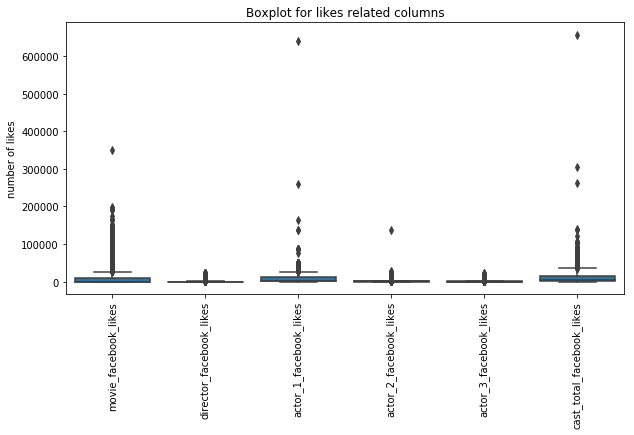

In [84]:
plt.figure(figsize = [10,5])
sb.boxplot(x="variable", y="value", data=df_movies_clean[likes].melt(),color=base_color)
plt.title("Boxplot for likes related columns")
plt.xlabel("")
plt.ylabel("number of likes")
plt.xticks(rotation = 90);
plt.show()

In [85]:
df_movies_clean[likes].describe()

,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
count,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000,3733.000000
mean,9026.744709,797.596035,7575.385481,1953.735334,744.023038,11235.259041
std,21319.294329,3059.804006,15521.625810,4475.980967,1832.874467,18996.883679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,723.000000,368.000000,186.000000,1845.000000
50%,204.000000,58.000000,1000.000000,664.000000,429.000000,3917.000000
75%,11000.000000,226.000000,12000.000000,971.000000,685.000000,15922.000000
max,349000.000000,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000


##### Define

Adding a columns with the difference between 'cast_total_facebook_likes' and the sum of the likes of the cast

##### Code

In [86]:
df_movies_clean['likes_check']=df_movies_clean['cast_total_facebook_likes']-(df_movies_clean['director_facebook_likes']+\
                                df_movies_clean['actor_1_facebook_likes'] + df_movies_clean['actor_2_facebook_likes']\
                                + df_movies_clean['actor_3_facebook_likes'])

##### Test

In [87]:
df_movies_clean[['likes_check','cast_total_facebook_likes','director_facebook_likes','actor_1_facebook_likes',\
                'actor_2_facebook_likes','actor_3_facebook_likes']].head(5)

,likes_check,cast_total_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,2043,4834,0,1000,936,855
1,1787,48350,563,40000,5000,1000
2,146,11700,0,11000,393,161
3,11759,106759,22000,27000,23000,23000
5,-404,1873,475,640,632,530


In [88]:
df_movies_clean.likes_check.describe()

count     3733.000000
mean       164.519153
std       3273.650571
min     -21749.000000
25%         43.000000
50%        432.000000
75%       1092.000000
max      26000.000000
Name: likes_check, dtype: float64

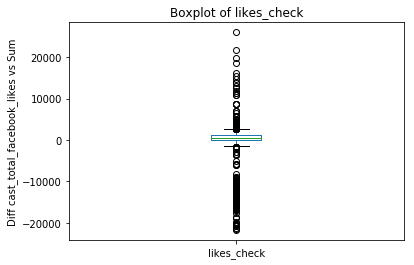

In [89]:
df_movies_clean['likes_check'].plot(kind='box')
plt.ylabel('Diff cast_total_facebook_likes vs Sum')
plt.title("Boxplot of likes_check");

#### Likes 
> Looking a the variability of the likes, it will be important during the exploration phase to study which likes counts eventually could be used, if some.

<a id='exporting'></a>
### Exporting Cleaned data in csv
<a href="#table">Back to table of content</a>

In [90]:
df_movies_clean.to_csv('df_movies_clean.csv', encoding='utf_8', index=False)